In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [2]:
data['quality'].replace('good',1,inplace = True)
data['quality'].replace('bad',-1,inplace = True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1


# 数据集划分

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#训练集和测试集划分
x = data.drop("quality",axis=1)
y = data["quality"].astype("int")

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# 机器学的的LDA

In [4]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)

In [5]:
print(classification_report(y_test, y_pred, target_names=["good",'bad']))

              precision    recall  f1-score   support

        good       0.73      0.74      0.74       226
         bad       0.77      0.75      0.76       254

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



正确率 0.7479166666666667


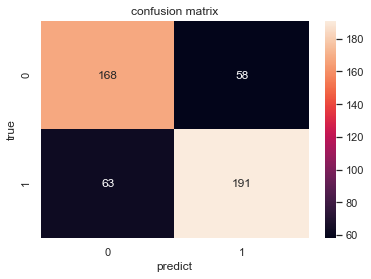

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots()
C = confusion_matrix(y_test, y_pred)
sns.heatmap(C,annot=True,ax=ax,fmt="d") #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict')
ax.set_ylabel('true') 

print("正确率",accuracy_score(y_test, y_pred))

# 自己实现的FDA

In [7]:
data_train = pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
data_test = pd.concat([x_test,pd.DataFrame(y_test)],axis=1)

In [8]:
n,m =data_train.shape

In [9]:
good_data= data_train[data_train["quality"]==1].copy()
bad_data = data_train[data_train["quality"]==-1].copy()

In [10]:
good_data.drop(["quality"],axis=1,inplace=True)
bad_data.drop(["quality"],axis=1,inplace=True)

In [11]:
n1, m1 = good_data.shape
n2, m2 = bad_data.shape

\begin{equation}
\hat{\mu}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n} x_{i}, \quad \hat{\Sigma}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\hat{\mu}_{\mathrm{ML}}\right)\left(x_{i}-\hat{\mu}_{\mathrm{ML}}\right)^{\top}
\end{equation}

In [12]:
# 极大似然估计均值
mu_good = np.array(np.mean(good_data,axis=0))
mu_bad = np.array(np.mean(bad_data,axis=0))

In [13]:
# 极大似然估计方差
S = np.cov(good_data.T)*n1/n+np.cov(bad_data.T)*n2/n

\begin{aligned}
\log \hat{p}(y \mid x)=& \boldsymbol{x}^{\mathrm{T}} \hat{\mathbf{\Sigma}}^{-1} \hat{\boldsymbol{\mu}}_{\mathrm{y}}-\frac{1}{2} \hat{\boldsymbol{\mu}}_{\mathrm{y}}^{\mathrm{T}} \hat{\mathbf{\Sigma}}^{-1} \hat{\mu}_{\mathrm{y}}+\log \frac{n_{y}}{n}+C^{\prime}
\end{aligned}

In [14]:
# 计算类后验概率
h_good = np.dot(np.linalg.inv(S),mu_good)
h_bad = np.dot(np.linalg.inv(S),mu_bad)
p1 = np.dot(data_test.drop(["quality"],axis=1),h_good)-np.dot(mu_good.T,h_good)/2+np.log(n1/n)
p2 = np.dot(data_test.drop(["quality"],axis=1),h_bad)-np.dot(mu_bad.T,h_bad)/2+np.log(n2/n)

\begin{equation}
\operatorname{sign}(x)=\left\{\begin{array}{ll}
1, & x>0 \\
0, & x=0 \\
-1, & x<0
\end{array}\right.
\end{equation}

\begin{equation}
\hat{y}=\underset{y}{\arg \max } p(y \mid x)
\end{equation}

In [15]:
# 最大后验概率规则
result = np.sign(p1 - p2)

In [16]:
np.sum(result==0)  # 防止类别模糊的影响结果

0

Text(30.5, 0.5, 'true')

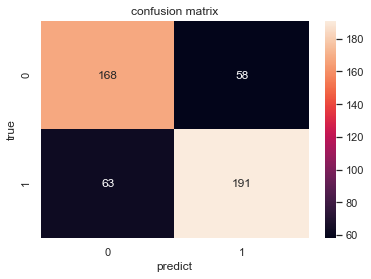

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots()
true = np.array(data_test['quality']).astype("int")
pred = result.astype("int")
C = confusion_matrix(true, pred)
sns.heatmap(C,annot=True,ax=ax,fmt="d") #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict')
ax.set_ylabel('true') 